In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely as shp
import matplotlib.patheffects as PathEffects
import seaborn as sns
% matplotlib inline

# Reading the datasets

In [2]:
y1 = (pd.read_csv('./datasets_2/1437.csv')).dropna()
y2 = (pd.read_csv('./datasets_2/1438.csv')).dropna()
y3 = (pd.read_csv('./datasets_2/1439.csv')).dropna()

y1.head()

,region,month,accidents including damages,accidents including injuries,accidents including mortalities,total number of accidents,injuries,mortalities,intact,total number of people involved in RTA
0,Al-Baha,Moharram,314.0,55.0,4.0,373.0,104.0,5.0,712.0,821.0
1,Al-Baha,Safar,462.0,65.0,11.0,538.0,136.0,15.0,1021.0,1172.0
2,Al-Baha,Rabeea Awal,360.0,48.0,11.0,419.0,107.0,15.0,759.0,881.0
3,Al-Baha,Rabeea Thany,304.0,32.0,8.0,344.0,74.0,9.0,630.0,713.0
4,Al-Baha,Jamad Awal,375.0,50.0,15.0,440.0,118.0,17.0,870.0,1005.0


In [3]:
# Imorting interpolation module from scipy library to use for smoothing the plot
from scipy.interpolate import make_interp_spline

# preparing the datasets

In [4]:
y1_sum = y1.groupby('month', as_index= False, sort=False).sum()
y2_sum = y2.groupby('month', as_index= False, sort=False).sum()
y3_sum = y3.groupby('month', as_index= False, sort=False).sum()

In [5]:
y1_sum.head()

,month,accidents including damages,accidents including injuries,accidents including mortalities,total number of accidents,injuries,mortalities,intact,total number of people involved in RTA
0,Moharram,44688.0,1883.0,560.0,47131.0,3192.0,734.0,76214.0,80140.0
1,Safar,43605.0,1958.0,587.0,46150.0,3500.0,733.0,74083.0,78316.0
2,Rabeea Awal,42878.0,1999.0,566.0,45443.0,3261.0,725.0,75847.0,79833.0
3,Rabeea Thany,43722.0,2022.0,581.0,46325.0,3263.0,770.0,76366.0,80399.0
4,Jamad Awal,45597.0,1800.0,539.0,47936.0,3122.0,691.0,80332.0,84145.0


# Plotting the timeseries

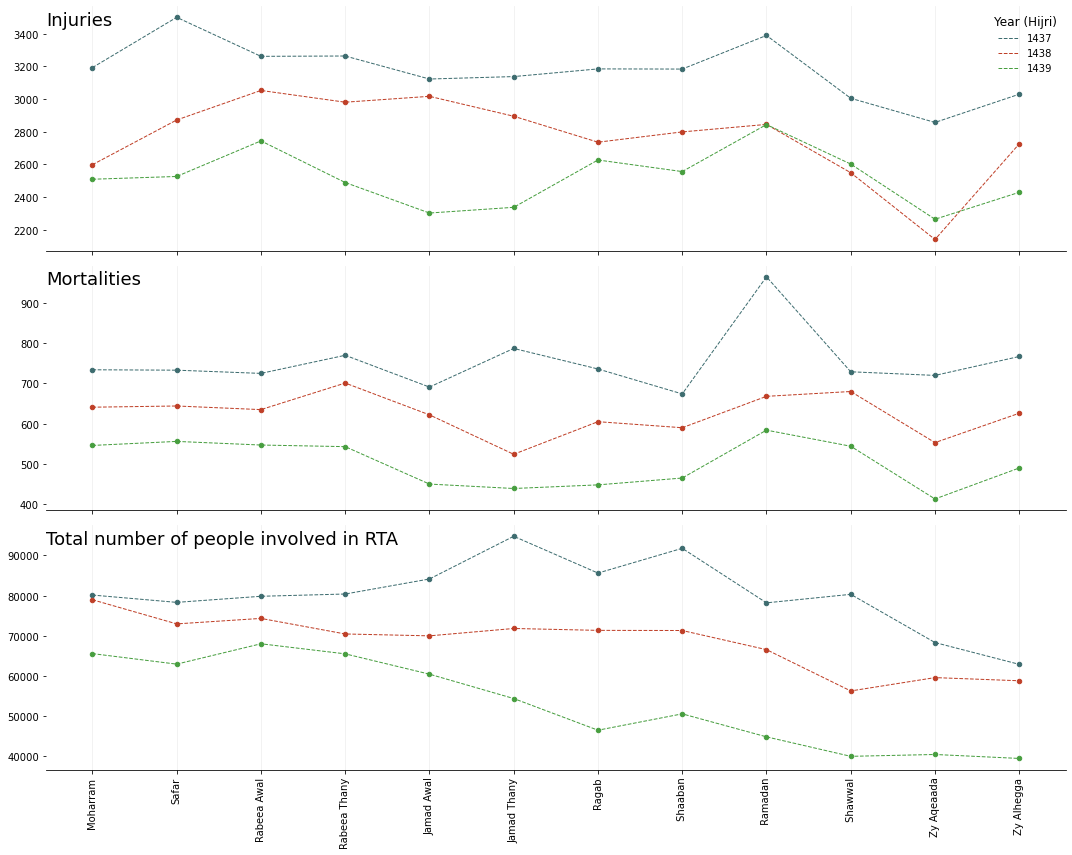

In [6]:
fig,ax = plt.subplots(ncols = 1, nrows =3, figsize =(15,4*3), facecolor = 'w')


for i,variable in zip([0,1,2],['injuries','mortalities','total number of people involved in RTA']):

    colors = ['#3d6c6f','#bf3f27','#479e3f']
    ax[i].set_prop_cycle(color = colors )
    
    for year, label in zip([y1_sum,y2_sum,y3_sum],['1437','1438','1439']):
        x = np.arange(12)
        y = year[variable]

        x_y_Spline = make_interp_spline(x, y)

        x_ = np.linspace(x.min(), x.max(), 12)
        y_ = x_y_Spline(x_)

        ax[i].plot(x_,y_, label = label, zorder = 4, linewidth = 1, linestyle = '--')
        ax[i].scatter(x,y,s=20, zorder = 5)

    ax[i].set_xticks(x)
    ax[i].set_title(variable.capitalize(), loc = 'left', y = 0.9, size = 18)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)

    ax[i].grid(axis='x',alpha = 0.2 ,zorder = -1)
    
    if i == 2:
        ax[i].set_xticklabels(year['month'].values, rotation = 90)
    else:
        ax[i].set_xticklabels('')

ax[2].set_title('Total number of people involved in RTA', loc = 'left', y = 0.9, size = 18)
legend = ax[0].legend(title = 'Year (Hijri)', ncol=1, fontsize=10,title_fontsize=12, facecolor='None')
legend.get_frame().set_linewidth(0.0)

plt.tight_layout()
plt.savefig('./output/heatmaps/timeseries.jpg', dpi = 300)

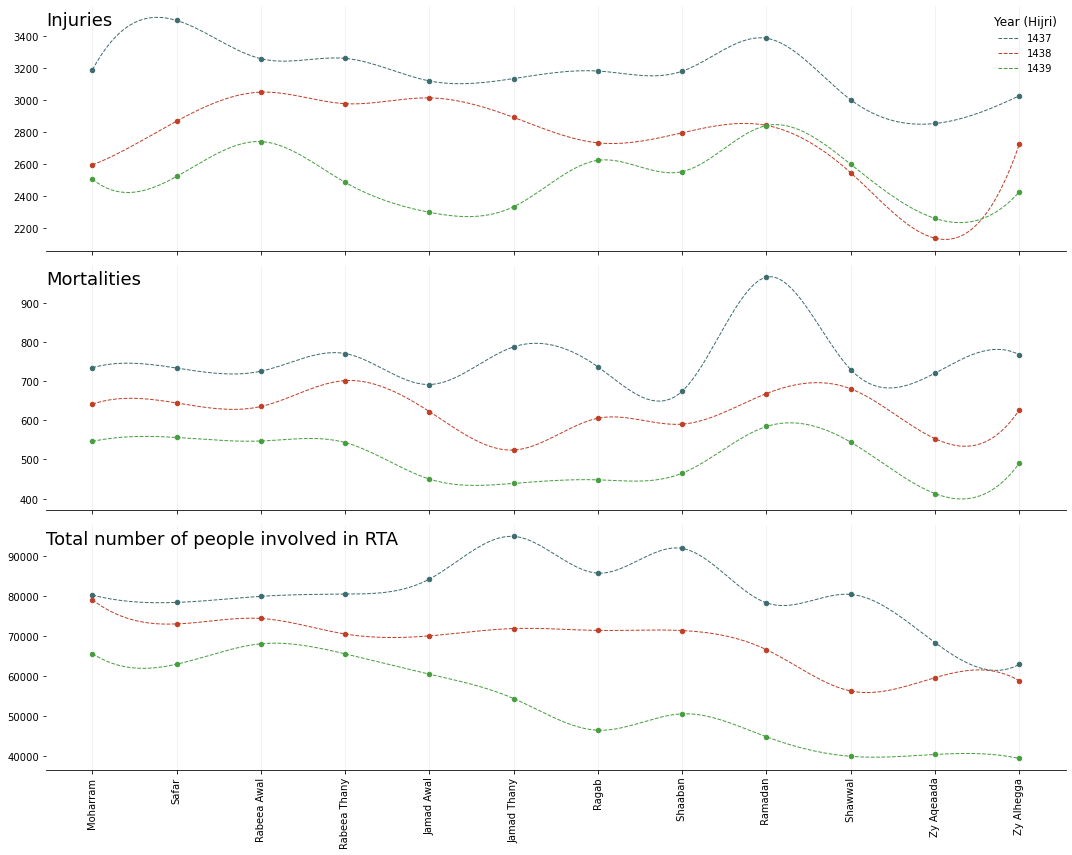

In [7]:
fig,ax = plt.subplots(ncols = 1, nrows =3, figsize =(15,4*3), facecolor = 'w')


for i,variable in zip([0,1,2],['injuries','mortalities','total number of people involved in RTA']):

    colors = ['#3d6c6f','#bf3f27','#479e3f']
    ax[i].set_prop_cycle(color = colors )
    
    for year, label in zip([y1_sum,y2_sum,y3_sum],['1437','1438','1439']):
        x = np.arange(12)
        y = year[variable]

        x_y_Spline = make_interp_spline(x, y)

        x_ = np.linspace(x.min(), x.max(), 200)
        y_ = x_y_Spline(x_)

        ax[i].plot(x_,y_, label = label, zorder = 4, linewidth = 1, linestyle = '--')
        ax[i].scatter(x,y,s=20, zorder = 5)

    ax[i].set_xticks(x)
    ax[i].set_title(variable.capitalize(), loc = 'left', y = 0.9, size = 18)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)

    ax[i].grid(axis='x',alpha = 0.2 ,zorder = -1)
    
    if i == 2:
        ax[i].set_xticklabels(year['month'].values, rotation = 90)
    else:
        ax[i].set_xticklabels('')

ax[2].set_title('Total number of people involved in RTA', loc = 'left', y = 0.9, size = 18)
legend = ax[0].legend(title = 'Year (Hijri)', ncol=1, fontsize=10,title_fontsize=12, facecolor='None')
legend.get_frame().set_linewidth(0.0)

plt.tight_layout()
plt.savefig('./output/heatmaps/timeseries_smooth.jpg', dpi = 300)